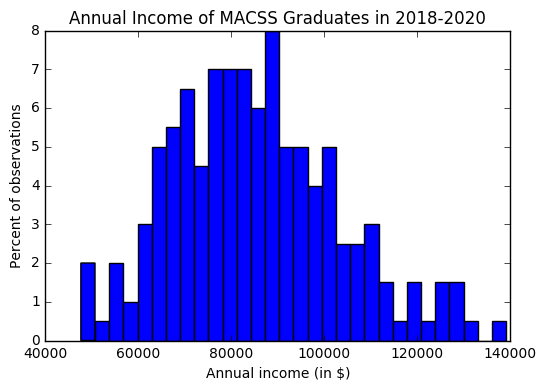

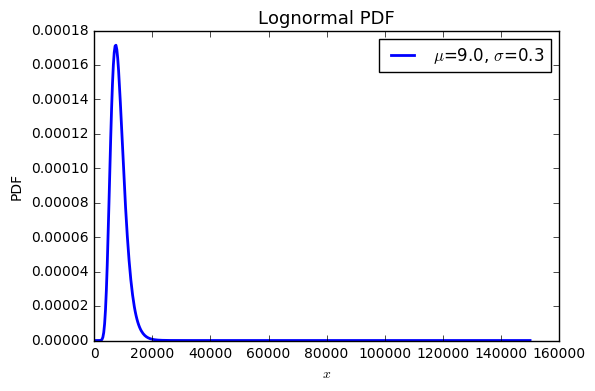

1b.  The log-likelihood value for given parametrization and given this data is -8298.636956005032
1c. 
mu_MLE= 11.3314402912  sig_MLE= 0.211674548907
Log-likelihood given these pararmeters is :  -2239.5347439980173
The variance-covariance matrix is :  [[ 0.00030509  0.00018702]
 [ 0.00018702  0.00054462]]


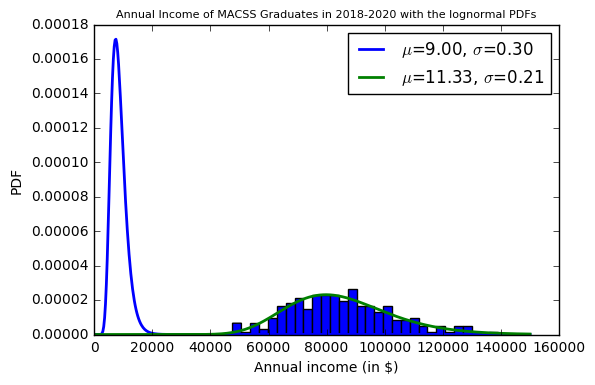

1d.  chi squared of H0 with 2 degrees of freedom p-value is  0.0
p-value equals to 0, so we can reject the null hypothesis. So the data did not come from distribution in part b.
1e. 
The probability that a student will earn more than $100,000 is 0.1958
The probability that a student will earn less than $75,000 is 0.3077
2a.
b0_MLE= 0.251647161896  b1_MLE= 0.0129333894972 ,  b2_MLE= 0.400502025415 ,  b3_MLE= -0.00999171308743 ,  sig_squared_MLE= 9.10630265262e-06 .
Log-likelihood :  876.8650389669244
The variance-covariance matrix is:  [[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]
2b.  Likelihood Ratio Test p-value is  0.0
So it is unlikely that age, number of children, and average winter temperature have no effect on the sick days.


In [74]:
# MACSS 30100
# PS 2
# Esha Banerjee

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy as sp
import scipy.stats as sts


def lognorm_pdf(xvals, mu, sigma, cutoff):        
    if cutoff == 'None':
        prob_notcut = 1.0
    else:
        prob_notcut = sts.lognorm.cdf(cutoff, s = sigma, loc = mu, scale = np.exp(mu))
    pdf_vals = (1/(xvals * sigma * np.sqrt(2 * np.pi)) * np.exp( - (np.log(xvals) - mu)**2 
                                                                / (2 * sigma**2))) / prob_notcut
    return pdf_vals
    
def log_lik_lognorm(xvals, mu, sigma, cutoff):
    pdf_vals = lognorm_pdf(xvals, mu, sigma, cutoff)
    ln_pdf_vals = np.log(pdf_vals)
    log_lik_val = ln_pdf_vals.sum()
    return log_lik_val

def crit(params, *args):
    mu, sigma = params
    xvals, cutoff, method = args
    log_lik_val = log_lik_lognorm(xvals, mu, sigma, cutoff)
    neg_log_lik_val = -log_lik_val
    return neg_log_lik_val


def minimizer(mu_init, sig_init, mle_args):
    mu_init = mu_init
    sig_init = sig_init
    params_init = np.array([mu_init, sig_init])
    mle_args = mle_args
    bnds = ((None, None), (.0001, None))
    results = sp.optimize.minimize(crit, params_init, args=(mle_args), bounds=bnds)
    mu_MLE, sig_MLE = results.x
    return (results, mu_MLE, sig_MLE)

   
df = pd.read_table('incomes.txt', names = ['incomes'])

#1a
graph = True
...
if graph:
    
    # Create directory if images directory does not already exist
    cur_path = os.path.split(os.path.abspath("__file__"))[0]
    output_fldr = "images for Persp_Model PS2"
    output_dir = os.path.join(cur_path, output_fldr)
    if not os.access(output_dir, os.F_OK):
        os.makedirs(output_dir)

    fig, ax = plt.subplots()
    hist_wgts = (100/ len(df['incomes']) )* np.ones(len(df['incomes']))
    count, bin_cuts, patches = plt.hist(df['incomes'], 30, weights = hist_wgts)    
    plt.title('Annual Income of MACSS Graduates in 2018-2020', fontsize = 12)
    plt.xlabel(r'Annual income (in $)')
    plt.ylabel(r'Percent of observations')
    output_path = os.path.join(output_dir, 'Fig_1a')
    plt.savefig(output_path)
    plt.show()
    plt.close()
    

#1b
dist_pts = np.linspace(0, 150000, 500)
mu_1 = 9
sig_1 = 0.3
plt.plot(dist_pts, lognorm_pdf(dist_pts, mu_1, sig_1, 'None'),
             linewidth = 2, color = 'blue', label = '$\mu$=9.0, $\sigma$=0.3')
plt.legend(loc = 'upper right')
plt.title('Lognormal PDF', fontsize=13)
plt.xlabel('$x$')
plt.ylabel(r'PDF')
output_path = os.path.join(output_dir, 'Fig_1b')
plt.savefig(output_path)
plt.show()
plt.close()
print('1b. ', 'The log-likelihood value for given parametrization and given this data is', 
      log_lik_lognorm(df['incomes'], mu_1, sig_1, 'None'))
    

# 1c
mu_init = 11.33
sig_init = 0.21
results, mu_MLE, sig_MLE = minimizer(mu_init, sig_init, (df['incomes'], 'None', 'SLSQP'))
vcv_mle = results.hess_inv.todense()
print('1c. ')
print('mu_MLE=', mu_MLE, ' sig_MLE=', sig_MLE)
print( 'Log-likelihood given these pararmeters is : ', log_lik_lognorm(df['incomes'], mu_MLE, sig_MLE, 'None'))
print('The variance-covariance matrix is : ', vcv_mle)

fig, ax = plt.subplots()
count, bins, ignored = plt.hist(df['incomes'], 30, normed=True)
plt.title('Annual Income of MACSS Graduates in 2018-2020 with the lognormal PDFs', fontsize = 8)
plt.xlabel(r'Annual income (in $)')
plt.ylabel(r'PDF')
plt.plot(dist_pts, lognorm_pdf(dist_pts, mu_1, sig_1, 'None'), linewidth=2, color='blue', 
         label='$\mu$=9.00, $\sigma$=0.30')
plt.plot(dist_pts, lognorm_pdf(dist_pts, mu_MLE, sig_MLE, 'None'), linewidth=2, color='green', 
         label='$\mu$=11.33, $\sigma$=0.21')
plt.legend(loc='upper right')
output_path = os.path.join(output_dir, 'Fig_1c')
plt.savefig(output_path)
plt.show()
plt.close()



#1d
log_lik_h0 = log_lik_lognorm(df['incomes'], mu_1, sig_1, 'None')
log_lik_mle = log_lik_lognorm(df['incomes'], mu_MLE, sig_MLE, 'None')
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 2)

print('1d. ', 'chi squared of H0 with 2 degrees of freedom p-value is ', pval_h0)
print('p-value equals to 0, so we can reject the null hypothesis. So the data did not come from distribution in part b.')

# 1e
probability1 =1 -  np.round(sts.lognorm.cdf(100000, s = sig_MLE, loc = mu_MLE, scale = np.exp(mu_MLE)), 4)
probability2 = np.round(sts.lognorm.cdf(75000, s = sig_MLE, loc = mu_MLE, scale = np.exp(mu_MLE)), 4)
print('1e. ')
print('The probability that a student will earn more than $100,000 is', probability1)
print('The probability that a student will earn less than $75,000 is', probability2)

df = pd.read_csv('sick.txt', skiprows = 1, names = ['sick', 'age', 'children', 'avgtemp_winter'])

# Part 2
def norm_pdf(xvals, mu, sigma, cutoff):
        if cutoff == 'None':
            prob_notcut = 1.0
        else:
            prob_notcut = sts.norm.cdf(cutoff, loc=mu, scale=sigma)
        pdf_vals = ((1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (xvals - mu)**2 / (2 * sigma**2))) / prob_notcut)
        return pdf_vals


def log_lik_2(xdf, b0, b1, b2, b3, sigma, cutoff):
        xvals = xdf['sick'] - b0 - b1 * xdf['age'] - b2 * xdf['children'] - b3 * xdf['avgtemp_winter']
        pdf_vals = norm_pdf(xvals, 0, sigma, cutoff)
        log_lik_val = np.log(pdf_vals).sum()
        return log_lik_val
    
def crit_2(params, *args):
        b0, b1, b2, b3, sigma = params
        xdf, cutoff, method = args
        log_lik_val = log_lik_2(xdf, b0, b1, b2, b3, sigma, cutoff)
        neg_log_lik_val = -log_lik_val
        return neg_log_lik_val

def minimizer_2(b0_init, b1_init, b2_init, b3_init, sig_init, mle_args):
        params_init = np.array([b0_init, b1_init, b2_init, b3_init, sig_init])
        mle_args = mle_args
        bnds = ((None, None), (None, None), (None, None), (None, None), (.000001, None))
        results = sp.optimize.minimize(crit_2, params_init, args=(mle_args), bounds=bnds, method=mle_args[2])
        b0_MLE, b1_MLE, b2_MLE, b3_MLE, sig_MLE = results.x
        return (results, b0_MLE, b1_MLE, b2_MLE, b3_MLE, sig_MLE)
# 2a
b0_init, b1_init, b2_init, b3_init, sig_init = (1, 0, 0, 0, 1)
results, b0_MLE, b1_MLE, b2_MLE, b3_MLE, sig_MLE =  minimizer_2(b0_init, b1_init, b2_init, b3_init, sig_init,
                                                                (df, 'None', 'SLSQP'))


b0_init, b1_init, b2_init, b3_init, sig_init = (b0_MLE, b1_MLE, b2_MLE, b3_MLE, sig_MLE)
results, b0_MLE, b1_MLE, b2_MLE, b3_MLE, sig_MLE =  minimizer_2(b0_init, b1_init, b2_init, b3_init, sig_init, 
                                                                (df, 'None', 'L-BFGS-B'))

print('2a.')
print( 'b0_MLE=', b0_MLE, ' b1_MLE=', b1_MLE, ',', ' b2_MLE=', b2_MLE, ',', ' b3_MLE=', b3_MLE,',', 
      ' sig_squared_MLE=', (sig_MLE)**2, '.')
print('Log-likelihood : ', log_lik_2(df, b0_MLE, b1_MLE, b2_MLE, b3_MLE, sig_MLE, 'None'))

vcv_mle = results.hess_inv.todense()
print('The variance-covariance matrix is: ', vcv_mle)


# 2b    
b0_test, b1_test, b2_test, b3_test, sig_test = (1, 0, 0, 0, 0.01)
log_lik_h0 = log_lik_2(df, b0_test, b1_test, b2_test, b3_test, sig_test, 'None')
log_lik_mle = log_lik_2(df, b0_MLE, b1_MLE, b2_MLE, b3_MLE, sig_MLE, 'None')
LR_val = 2 * (log_lik_mle - log_lik_h0)
pval_h0 = 1.0 - sts.chi2.cdf(LR_val, 5)

print('2b. ', 'Likelihood Ratio Test p-value is ', pval_h0)
print('So it is unlikely that age, number of children, and average winter temperature have no effect on the sick days.')